<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/adult_(Naive_Bayes_and_KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("adult.csv" , header=None , sep=',\s')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3198462284.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("adult.csv" , header=None , sep=',\s')
/tmp/ipython-input-3198462284.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("adult.csv" , header=None , sep=',\s')


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [7]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = cols

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
df.duplicated().sum()

np.int64(24)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
cat = [i for i in df.columns if df[i].dtype == 'O']
num = [i for i in df.columns if df[i].dtype != 'O']
cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [13]:
num

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [14]:
for i in cat:
  print(df[i].value_counts() , '\n==============================\n')

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64 

marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64 

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial

In [15]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
df.workclass.value_counts()

,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [17]:
  df.workclass.replace('?' , np.nan , inplace=True)

/tmp/ipython-input-3126577871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace('?' , np.nan , inplace=True)


In [18]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [19]:
df.workclass.value_counts()

,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [20]:
  df.replace('?' , np.nan , inplace=True)

In [21]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [22]:
df[num].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [23]:
df['capital_gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [24]:
df[num].isna().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0


In [25]:
x = df.drop('income' , axis=1)
y = df['income']

In [26]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x ,y ,test_size=0.3 , random_state=0)

In [27]:
xtrain.shape , xtest.shape

((22775, 14), (9762, 14))

In [28]:
xtrain.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [29]:
cat = [i for i in xtrain.columns if xtrain[i].dtype == 'O']
xtrain[cat].isna().mean()

,0
workclass,0.056158
education,0.000000
marital_status,0.000000
occupation,0.056378
relationship,0.000000
race,0.000000
sex,0.000000
native_country,0.017651


In [30]:
for i in [xtrain ,xtest]:
  i['workclass'].fillna(xtrain['workclass'].mode()[0] , inplace=True)
  i['occupation'].fillna(xtrain['occupation'].mode()[0] , inplace=True)
  i['native_country'].fillna(xtrain['native_country'].mode()[0] , inplace=True)

/tmp/ipython-input-3816266005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  i['workclass'].fillna(xtrain['workclass'].mode()[0] , inplace=True)
/tmp/ipython-input-3816266005.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [31]:
xtrain[cat].isna().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [32]:
xtest[cat].isna().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [33]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [34]:
import category_encoders as ce

enc = ce.OneHotEncoder(cols=cat)

xtrain = enc.fit_transform(xtrain)
xtest = enc.transform(xtest)

In [35]:
xtrain.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
13011,36,1,0,0,0,0,0,0,0,316298,...,0,0,0,0,0,0,0,0,0,0
24494,30,1,0,0,0,0,0,0,0,101283,...,0,0,0,0,0,0,0,0,0,0
16923,41,1,0,0,0,0,0,0,0,143003,...,0,0,0,0,0,0,0,0,0,0
25335,46,0,1,0,0,0,0,0,0,216414,...,0,0,0,0,0,0,0,0,0,0
12363,37,0,0,1,0,0,0,0,0,249392,...,0,0,0,0,0,0,0,0,0,0


In [36]:
xtrain.columns

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)

In [37]:
len(xtrain.columns)

105

In [38]:
xtrain.shape , xtest.shape

((22775, 105), (9762, 105))

In [39]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [40]:
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [41]:
cols.remove('income')

In [42]:
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [43]:
print(len(enc.get_feature_names_out(cat)))

105


In [44]:
xtrain = pd.DataFrame(xtrain , columns = [enc.get_feature_names_out(cat)])
xtest = pd.DataFrame(xtest , columns = [enc.get_feature_names_out(cat)])

In [45]:
len(xtrain.columns)

105

In [46]:
xtrain.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.164343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.645547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.294369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.601162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB

gn = GaussianNB()
mn = MultinomialNB()

gn.fit(xtrain , ytrain)
# mn.fit(xtrain , ytrain)

GaussianNB()

In [48]:
ypgn = gn.predict(xtest)

In [49]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(ytest , ypgn)
print(acc)

ygntrain = gn.predict(xtrain)
acctrain = accuracy_score(ytrain , ygntrain)
print(acctrain)

0.8056750665847162
0.8075521405049396


In [50]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(ytest , ypgn)
cm

array([[5914, 1431],
       [ 466, 1951]])

In [51]:
print(classification_report(ytest , ypgn))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7345
        >50K       0.58      0.81      0.67      2417

    accuracy                           0.81      9762
   macro avg       0.75      0.81      0.77      9762
weighted avg       0.84      0.81      0.82      9762



In [52]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

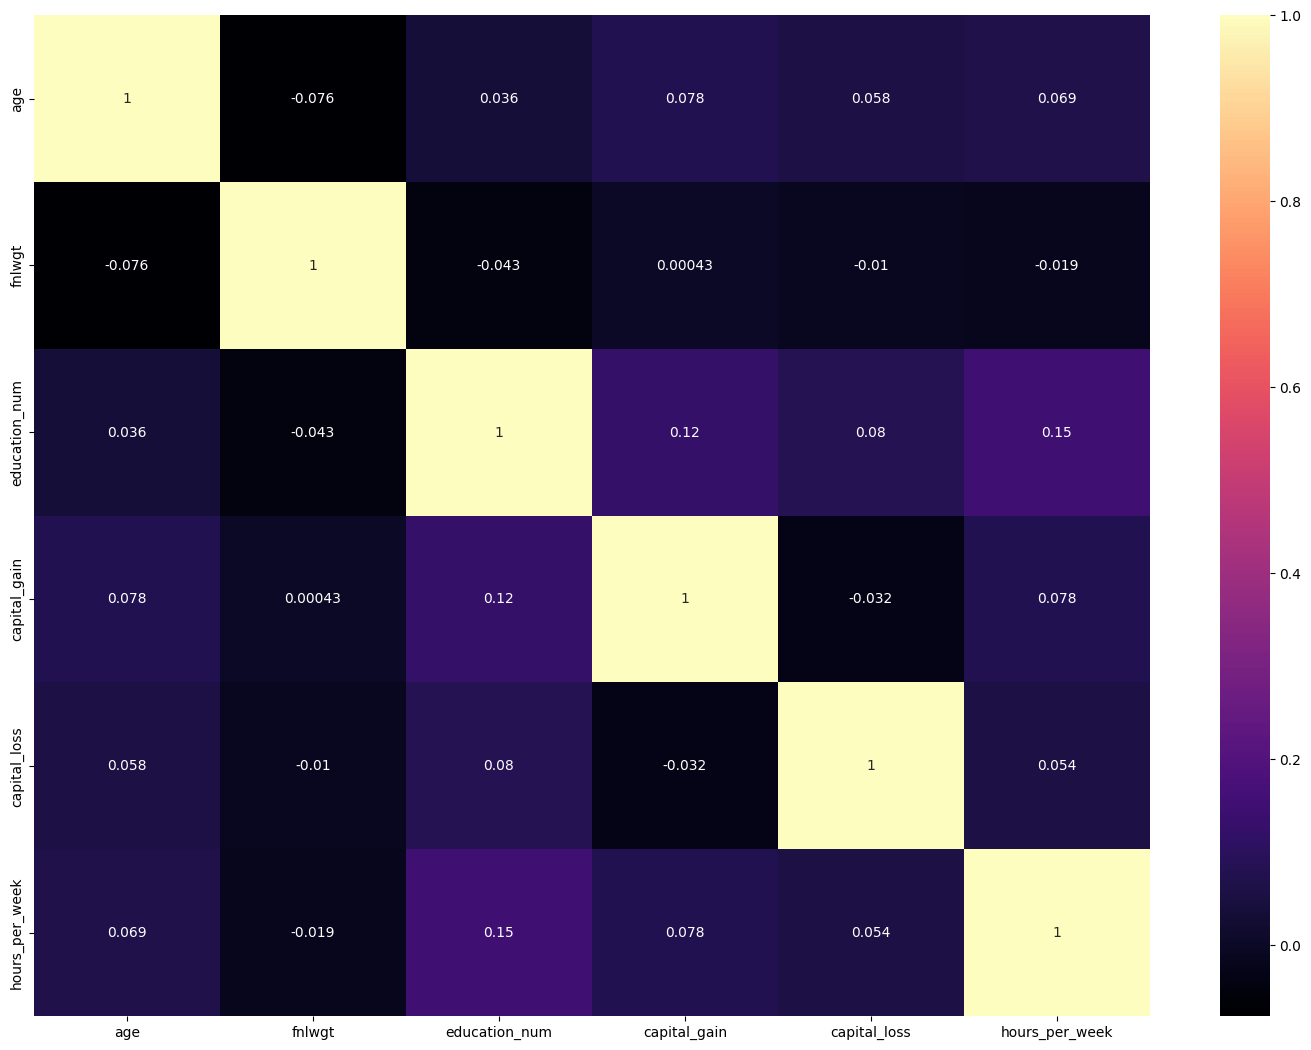

In [55]:
plt.figure(figsize=(18 , 13))
sns.heatmap(df.corr(numeric_only=True) , annot=True , cmap="magma" )
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn import metrics

In [61]:
k = 30
error = []
accuracy = []

for i in range(1, k+1):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain , ytrain)
  ypred = knn.predict(xtest)
  error.append(1-metrics.accuracy_score(ytest , ypred))
  accuracy.append(metrics.accuracy_score(ytest , ypred))

Text(0.5, 1.0, 'Accuracy vs K')

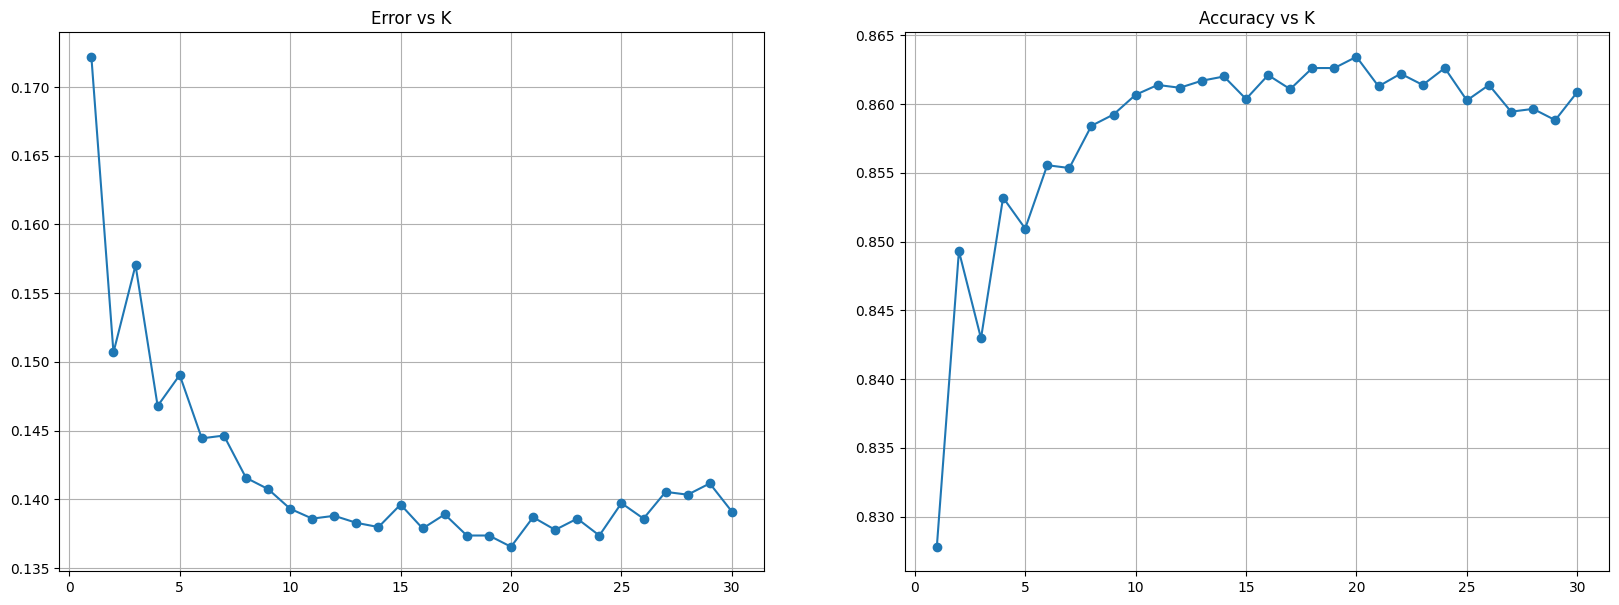

In [63]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,31) , error , marker='o')
plt.grid()
plt.title('Error vs K')

plt.subplot(1,2,2)
plt.plot(range(1,31) , accuracy , marker='o')
plt.grid()
plt.title('Accuracy vs K')


In [60]:
 k = 20
c = KNeighborsClassifier(k)
c.fit(xtrain , ytrain)
ypred = c.predict(xtest)
print(metrics.accuracy_score(ypred , ytest))

0.8634501126818275
